<a href="https://colab.research.google.com/github/arthursou/Loggi-IC/blob/master/Shape_Alagamentos_Resolucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# acontecendo erro na versão 3.3.3
!pip install matplotlib==3.1.3 

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
#Importando as bibliotecas
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point,LineString, MultiLineString
from osgeo import ogr
import numpy as np

In [4]:
# Pela coordenada do pluviometro
pluvio = gpd.read_file('/content/drive/MyDrive/IC_Arthur_UNIFESP/Dados/Dados_Oficiais/pluvio833A.shp')
coords =(float(pluvio['latitude']),float(pluvio['longitude']))

In [5]:
#carregando dados Shapefile de alagamentos
alagamentos = gpd.read_file('/content/drive/MyDrive/IC_Arthur_UNIFESP/Dados/Dados_Oficiais/Final-Alag2km.shp')

In [6]:
alagamentos

SEQ       LONG  ...  DUR_H                             geometry
0       7.0 -46.638806  ...   0.82  MULTIPOINT (332724.427 7394702.830)
1      13.0 -46.638580  ...   0.25  MULTIPOINT (332746.869 7394758.242)
2      14.0 -46.638240  ...   0.58  MULTIPOINT (332783.377 7394601.390)
3      15.0 -46.634830  ...   0.20  MULTIPOINT (333121.124 7395515.633)
4      22.0 -46.629470  ...   0.30  MULTIPOINT (333666.153 7395716.095)
..      ...        ...  ...    ...                                  ...
160  1126.0 -46.641682  ...   1.42  MULTIPOINT (332415.761 7396014.269)
161  1134.0 -46.637146  ...   0.55  MULTIPOINT (332891.017 7394957.028)
162  1139.0 -46.641155  ...   0.90  MULTIPOINT (332470.460 7395936.925)
163  1140.0 -46.641770  ...   0.90  MULTIPOINT (332406.834 7396009.183)
164  1161.0 -46.627042  ...   2.25  MULTIPOINT (333917.521 7395412.498)

[165 rows x 13 columns]

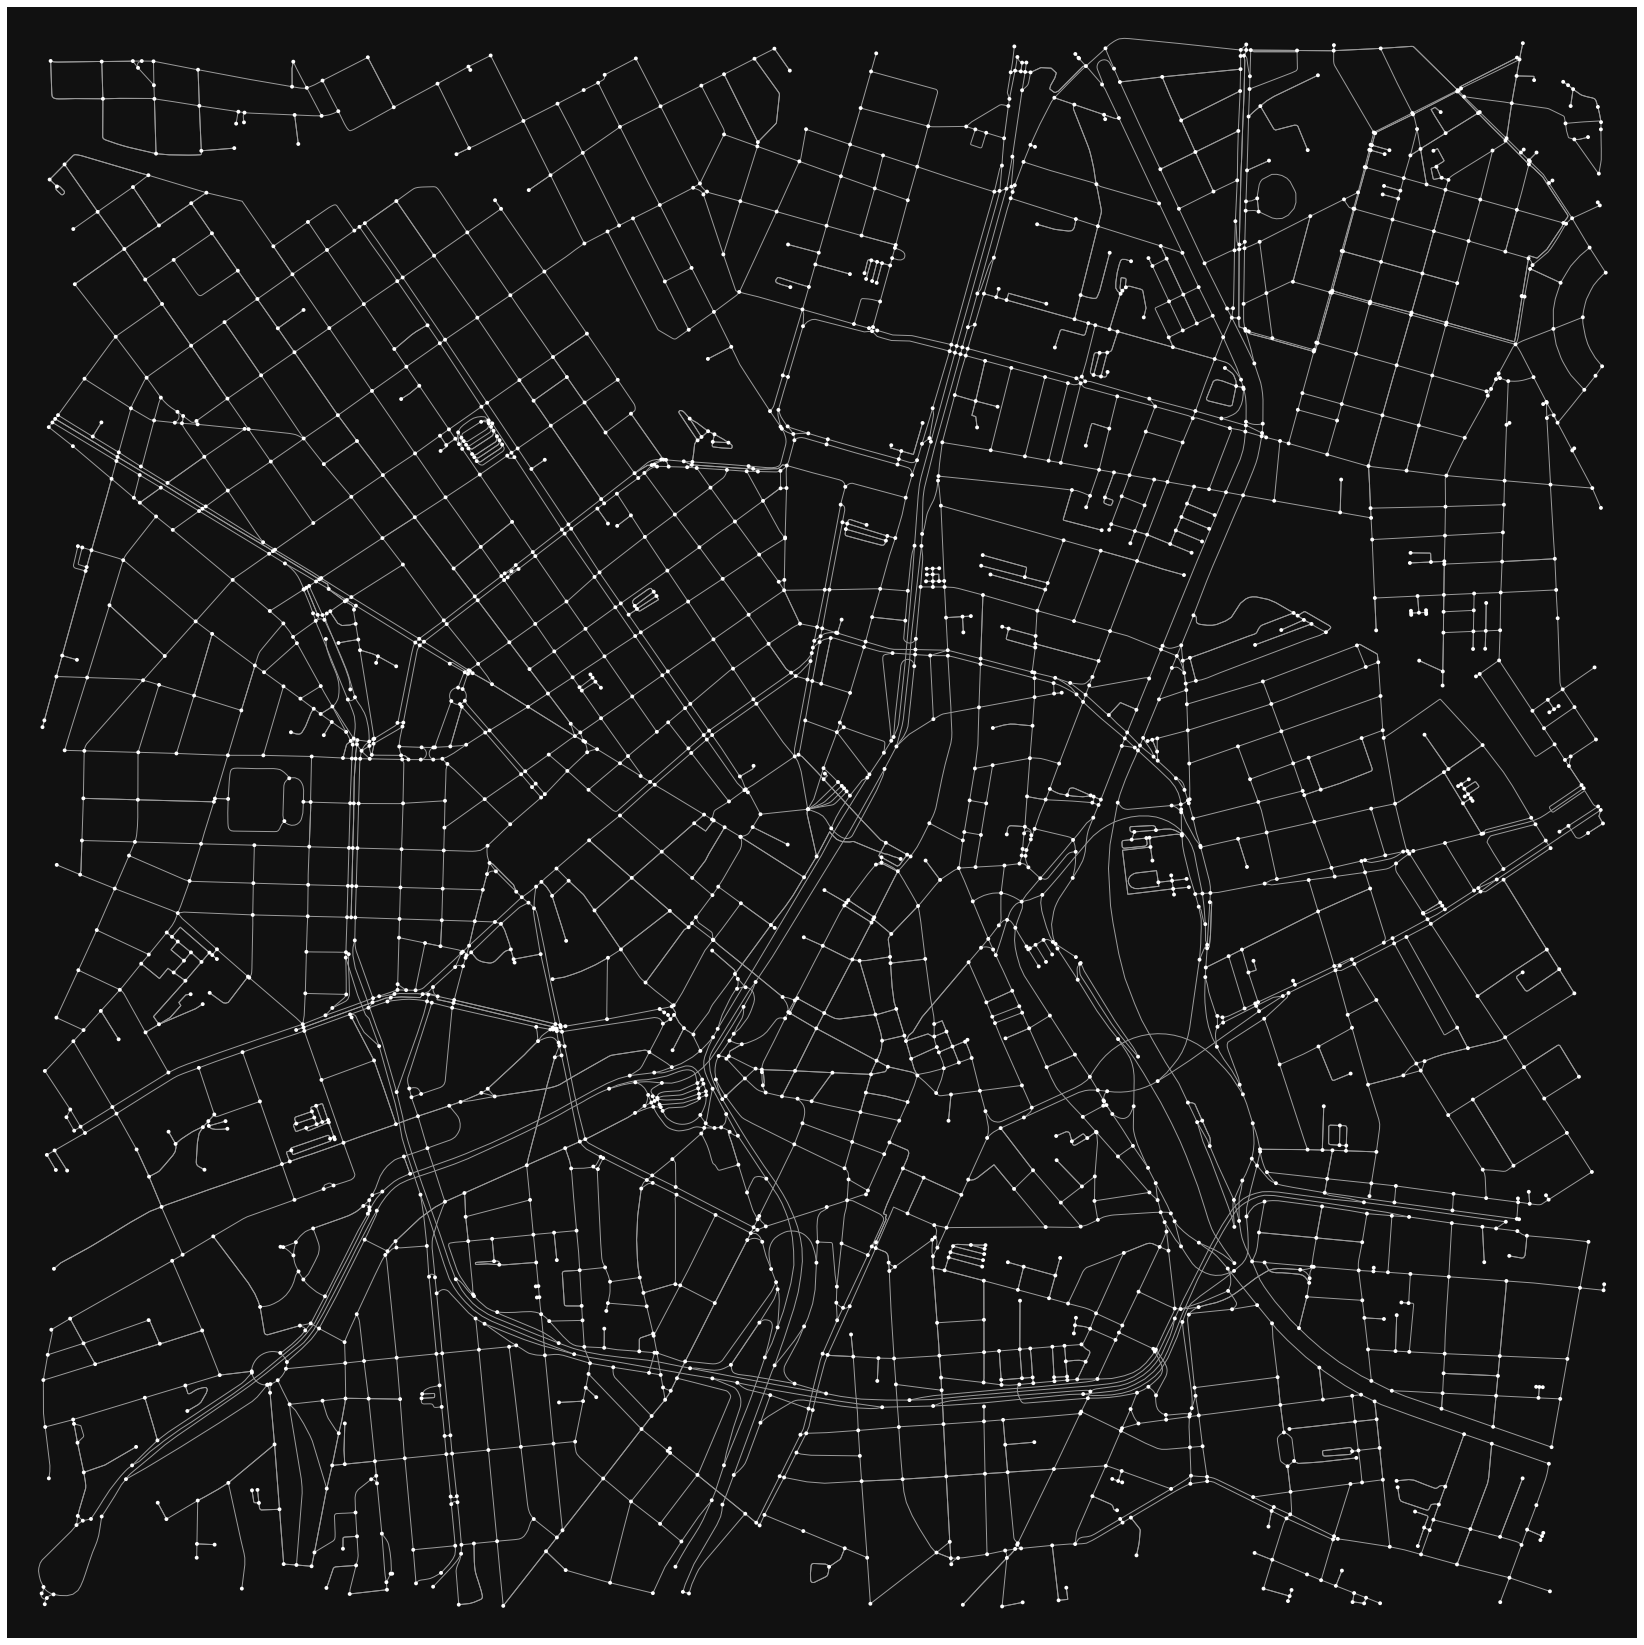

(<Figure size 2880x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87cfe52690>)

In [7]:
#obtendo coordenadas do pluviometro 833A e gerando grafo a partir desse raio
graph = ox.graph_from_point(coords,dist=2000, network_type='bike')
ox.plot_graph(graph,figsize=(40, 30))

In [8]:
graph = ox.project_graph(graph, to_crs= 4326) #convertendo para o crs correto

In [9]:
#carregando os nós e arestas do grafo gerado
nodes, edges = ox.graph_to_gdfs(graph)

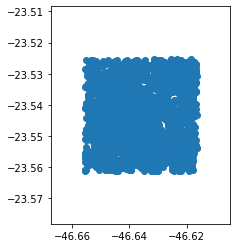

In [10]:
#plotando nos
nodes.plot()

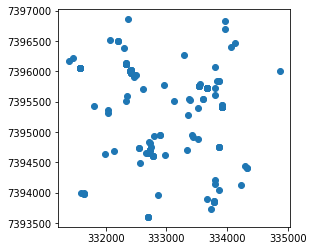

In [11]:
#plotando dados de alagamentos shapefile
alagamentos.plot()

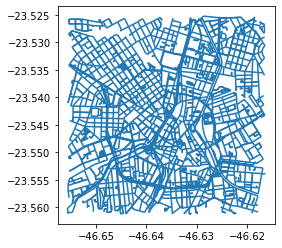

In [12]:
#plotando arestas do grafo
edges.plot()

In [13]:
#rua/ponto inicio de trajeto
rua1 = "Rua Madeira, São Paulo, Brasil"
x,y = ox.geocode(rua1)
orig_node = ox.nearest_nodes(G=graph,X=y,Y=x)
print(orig_node,x,y)

452092021 -23.4490793 -46.3025782


In [14]:
#rua de chegada do trajeto
rua2 = "Rua 25 d Março 238, São Paulo, Brasil"
x1,y1 = ox.geocode(rua2)
target_node = ox.nearest_nodes(G=graph,X=y1,Y=x1)
print(target_node,x1,y1)

4249855173 -23.5474871 -46.6310113


In [15]:
#convertendo para mesmo crs 
alagamentos = alagamentos.to_crs(4326)

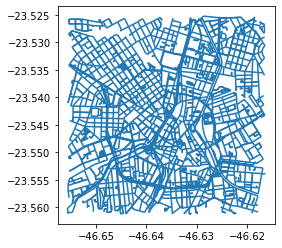

<Figure size 720x720 with 0 Axes>

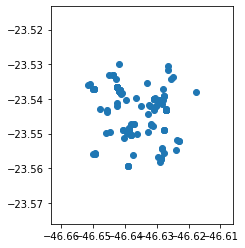

In [16]:
#plotando arestas e pontos de alagamentos


edges.plot()
plt.figure(figsize=(10,10))
alagamentos.plot()

plt.show()

In [17]:
#selecionando todos as coordenadas dos pontos de alagamento do shape

y_all_lat = []
x_all_long = []


for i in alagamentos['geometry']:
    
    multipoint = ogr.CreateGeometryFromWkt(str(i))
    point = multipoint.GetGeometryRef(0)
    y_all_lat.append(point.GetY())
    x_all_long.append(point.GetX())

print(y_all_lat)
print(x_all_long)
    

[-23.54940800069172, -23.54891000069172, -23.55033000069174, -23.54211000069156, -23.54035600069152, -23.53926000069149, -23.54312300069157, -23.53974000069151, -23.55033000069174, -23.53649600069142, -23.55577100069186, -23.54940800069172, -23.53649600069142, -23.55574300069186, -23.55134900069176, -23.54312300069157, -23.53704000069145, -23.53660000069143, -23.55033000069174, -23.54909100069172, -23.54981000069173, -23.55824000069192, -23.53823900069148, -23.5571950006919, -23.54908900069172, -23.53303000069137, -23.54908900069172, -23.53704000069145, -23.54035600069152, -23.53795000069147, -23.53660000069143, -23.53978100069151, -23.53753500069146, -23.55452000069184, -23.54312300069157, -23.54981000069173, -23.54909100069172, -23.5571950006919, -23.54035600069152, -23.55567000069186, -23.54979000069173, -23.54827000069169, -23.53357500069138, -23.5571950006919, -23.53416100069139, -23.54035600069152, -23.5392510006915, -23.54135200069154, -23.54908900069172, -23.53660000069143, -23

In [18]:
#encontrando todos os pontos de alagamento do shape no osmnx
all_nodes = []

for i in range(len(alagamentos)):
    all_nodes.append(ox.nearest_nodes(G=graph,X=x_all_long[i],Y=y_all_lat[i]))
    
print(len(all_nodes),all_nodes)

165 [25928964, 285488804, 4034133824, 4530629173, 1938339357, 2580258671, 8659531010, 1938339389, 4034133824, 64095069, 2140878170, 25928964, 64095069, 2441819626, 395763941, 8659531010, 2283841571, 64095074, 4034133824, 60685410, 4251744610, 246650791, 64095077, 445044382, 151243285, 64095064, 151243285, 2283841571, 1938339357, 64095075, 64095074, 2390933495, 64095075, 247951118, 8659531010, 4251744610, 60685410, 445044382, 1938339357, 2140878165, 4251744610, 25928961, 6213473290, 445044382, 171970567, 1938339357, 2580258671, 8073587469, 151243285, 64095074, 2283841571, 60686006, 64095074, 8659531010, 1477493799, 2283841571, 60641204, 64095074, 60685428, 4034133824, 64095075, 248110883, 8977158023, 1938339357, 248110872, 445044382, 64095077, 8659531010, 1938339357, 148492009, 64095075, 8953143574, 4251744610, 175993483, 452091580, 2283841571, 396034445, 2283841571, 25928964, 2283841571, 4011418236, 64095075, 64095074, 60641204, 64095075, 64095077, 60685726, 7292638266, 248110872, 2481

In [19]:
# Calculando o menor caminho e removendo os pontos de alagamentos
route = ox.shortest_path(graph, orig = orig_node, dest = target_node, weight='length')

G2 = graph.copy()

G2.remove_nodes_from(all_nodes)

rota_sem_alagamento = ox.shortest_path(G2, orig = orig_node, dest = target_node, weight='length')

print(route)
print(rota_sem_alagamento)

[452092021, 2931798713, 929634095, 452091701, 929634118, 3476782010, 3474049739, 3476782011, 3474049722, 9099314855, 9099314852, 9099314850, 452091626, 452091619, 1955031871, 452091618, 452091617, 2581691978, 3577328405, 2581690720, 3824584730, 25872763, 25872749, 246650435, 60734257, 1068077341, 461879147, 171976300, 461879227, 2395227702, 171976302, 171976304, 3406376394, 5128445335, 1938339357, 133485708, 4509509557, 5122017702, 599043086, 175993584, 2389060458, 2389060592, 7285140917, 2389060470, 1420146734, 60685982, 4803680668, 60685971, 4249855098, 4249855173]
[452092021, 2931798713, 929634095, 452091701, 5372645306, 6110752118, 461879324, 7986934526, 461875226, 461879350, 461879372, 3476781999, 461875205, 461875207, 5007915895, 8743131816, 8743228517, 2814556782, 7285629042, 171968212, 461894949, 461894945, 461894915, 437564551, 929701842, 434003387, 434003385, 8815902832, 2449978337, 434003382, 2389060633, 2449978343, 2449978345, 7990934267, 3701154929, 890510535, 8003099021, 

In [20]:
#calcula o tamanho da rotas em metros e numero de arestas
compri = ox.utils_graph.get_route_edge_attributes(graph,route)
comprimento_sem_alagamento = ox.utils_graph.get_route_edge_attributes(graph,rota_sem_alagamento)
a = 0
b = 0

for i in range(len(compri)):
        a += compri[i]['length']
print(f'Rota Vermelha: {a:.3f} metros')
print("Arestas:",len(route)-1)

for i in range(len(comprimento_sem_alagamento)):
        b += comprimento_sem_alagamento[i]['length']
print(f'Rota Amarela: {b:.3f} metros')
print('Arestas:',len(rota_sem_alagamento)-1)

Rota Vermelha: 3275.314 metros
Arestas: 49
Rota Amarela: 4423.223 metros
Arestas: 52


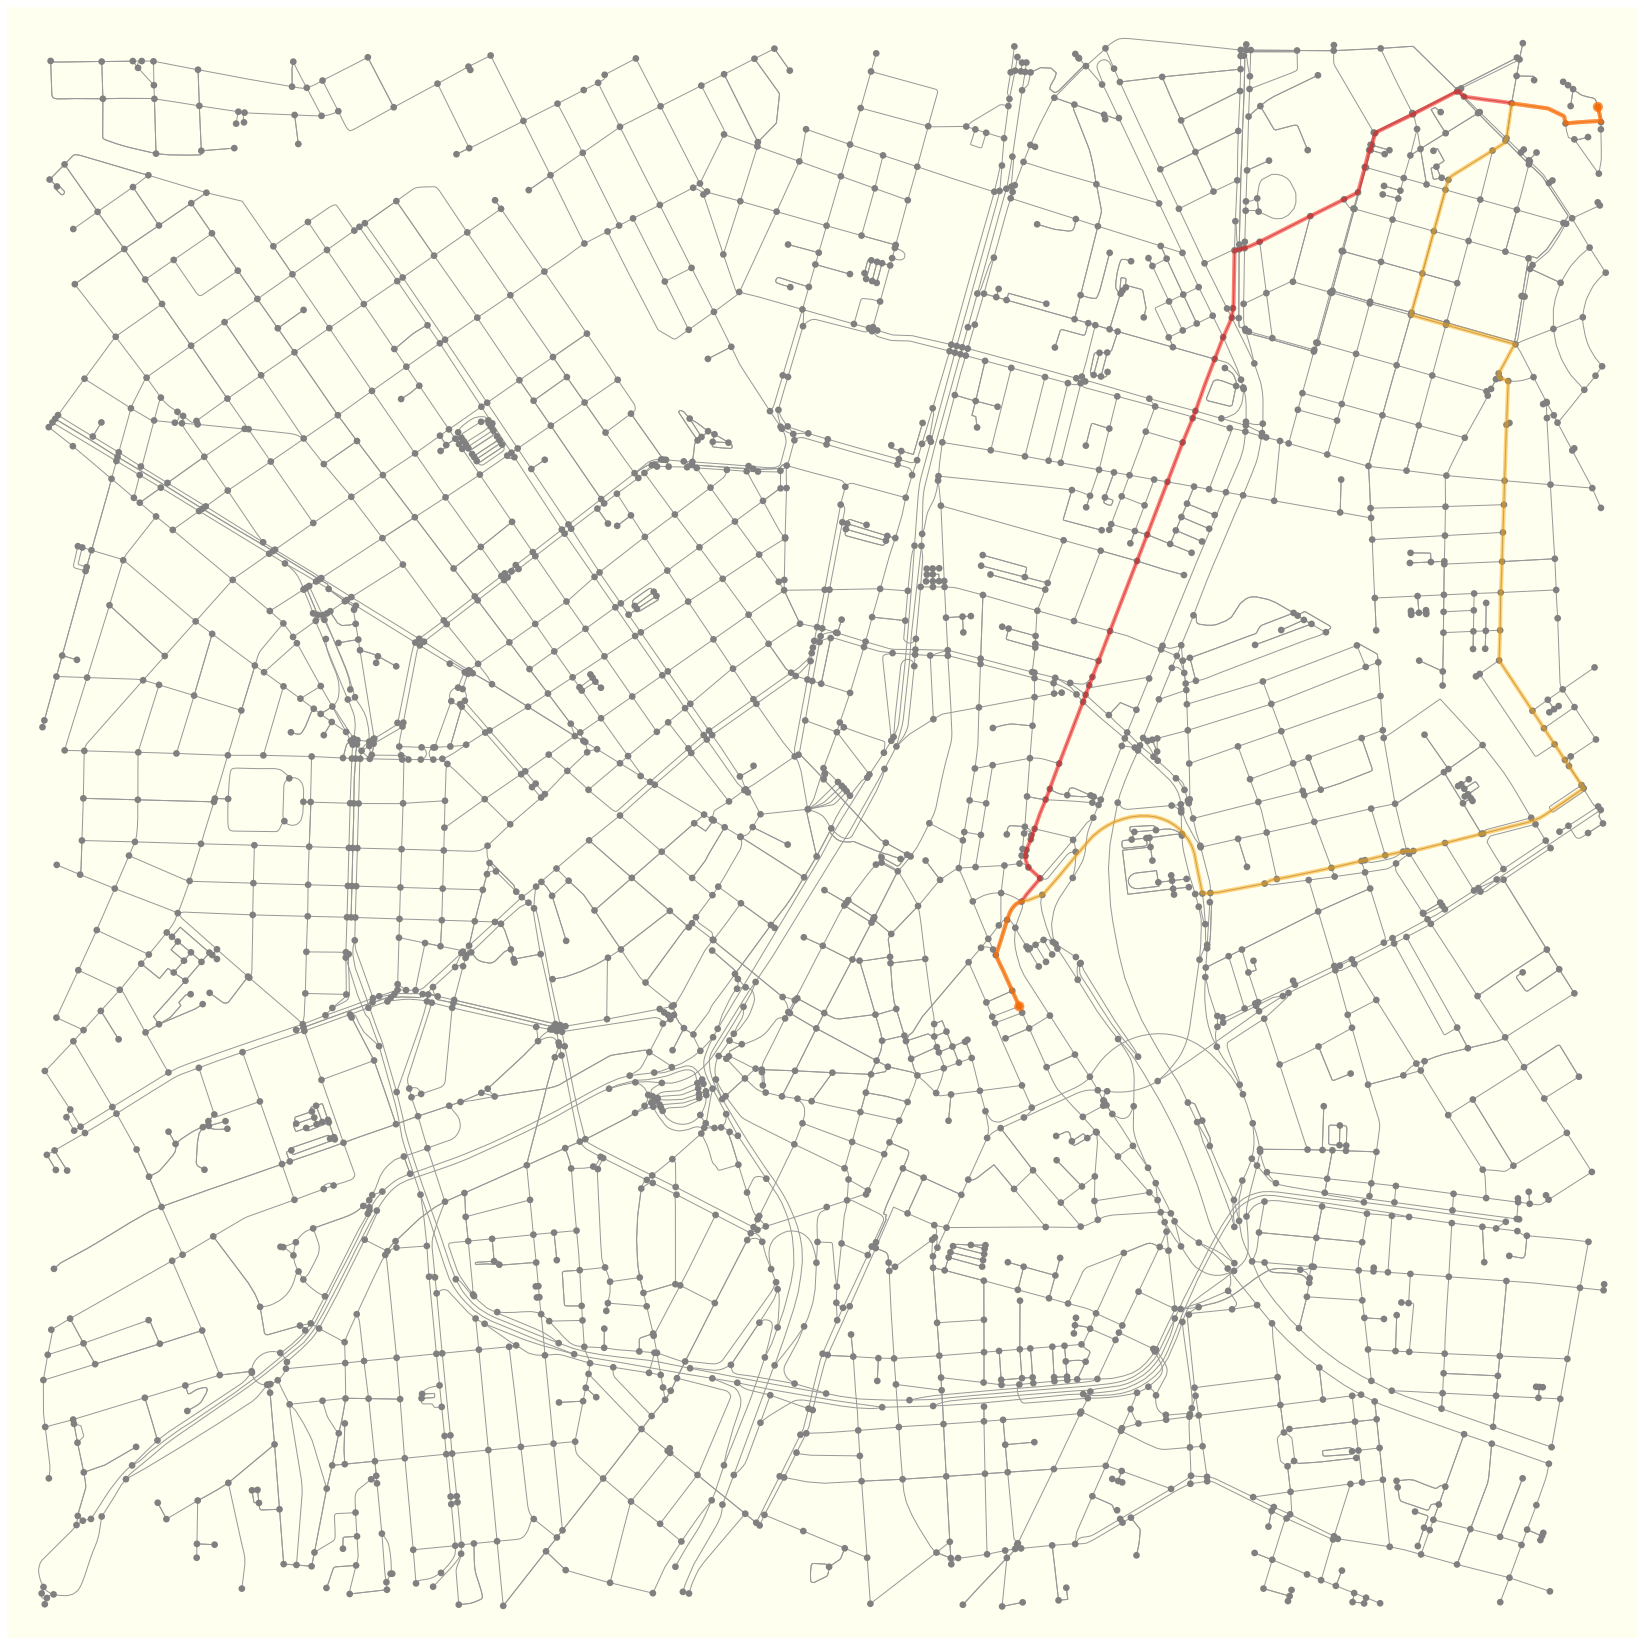

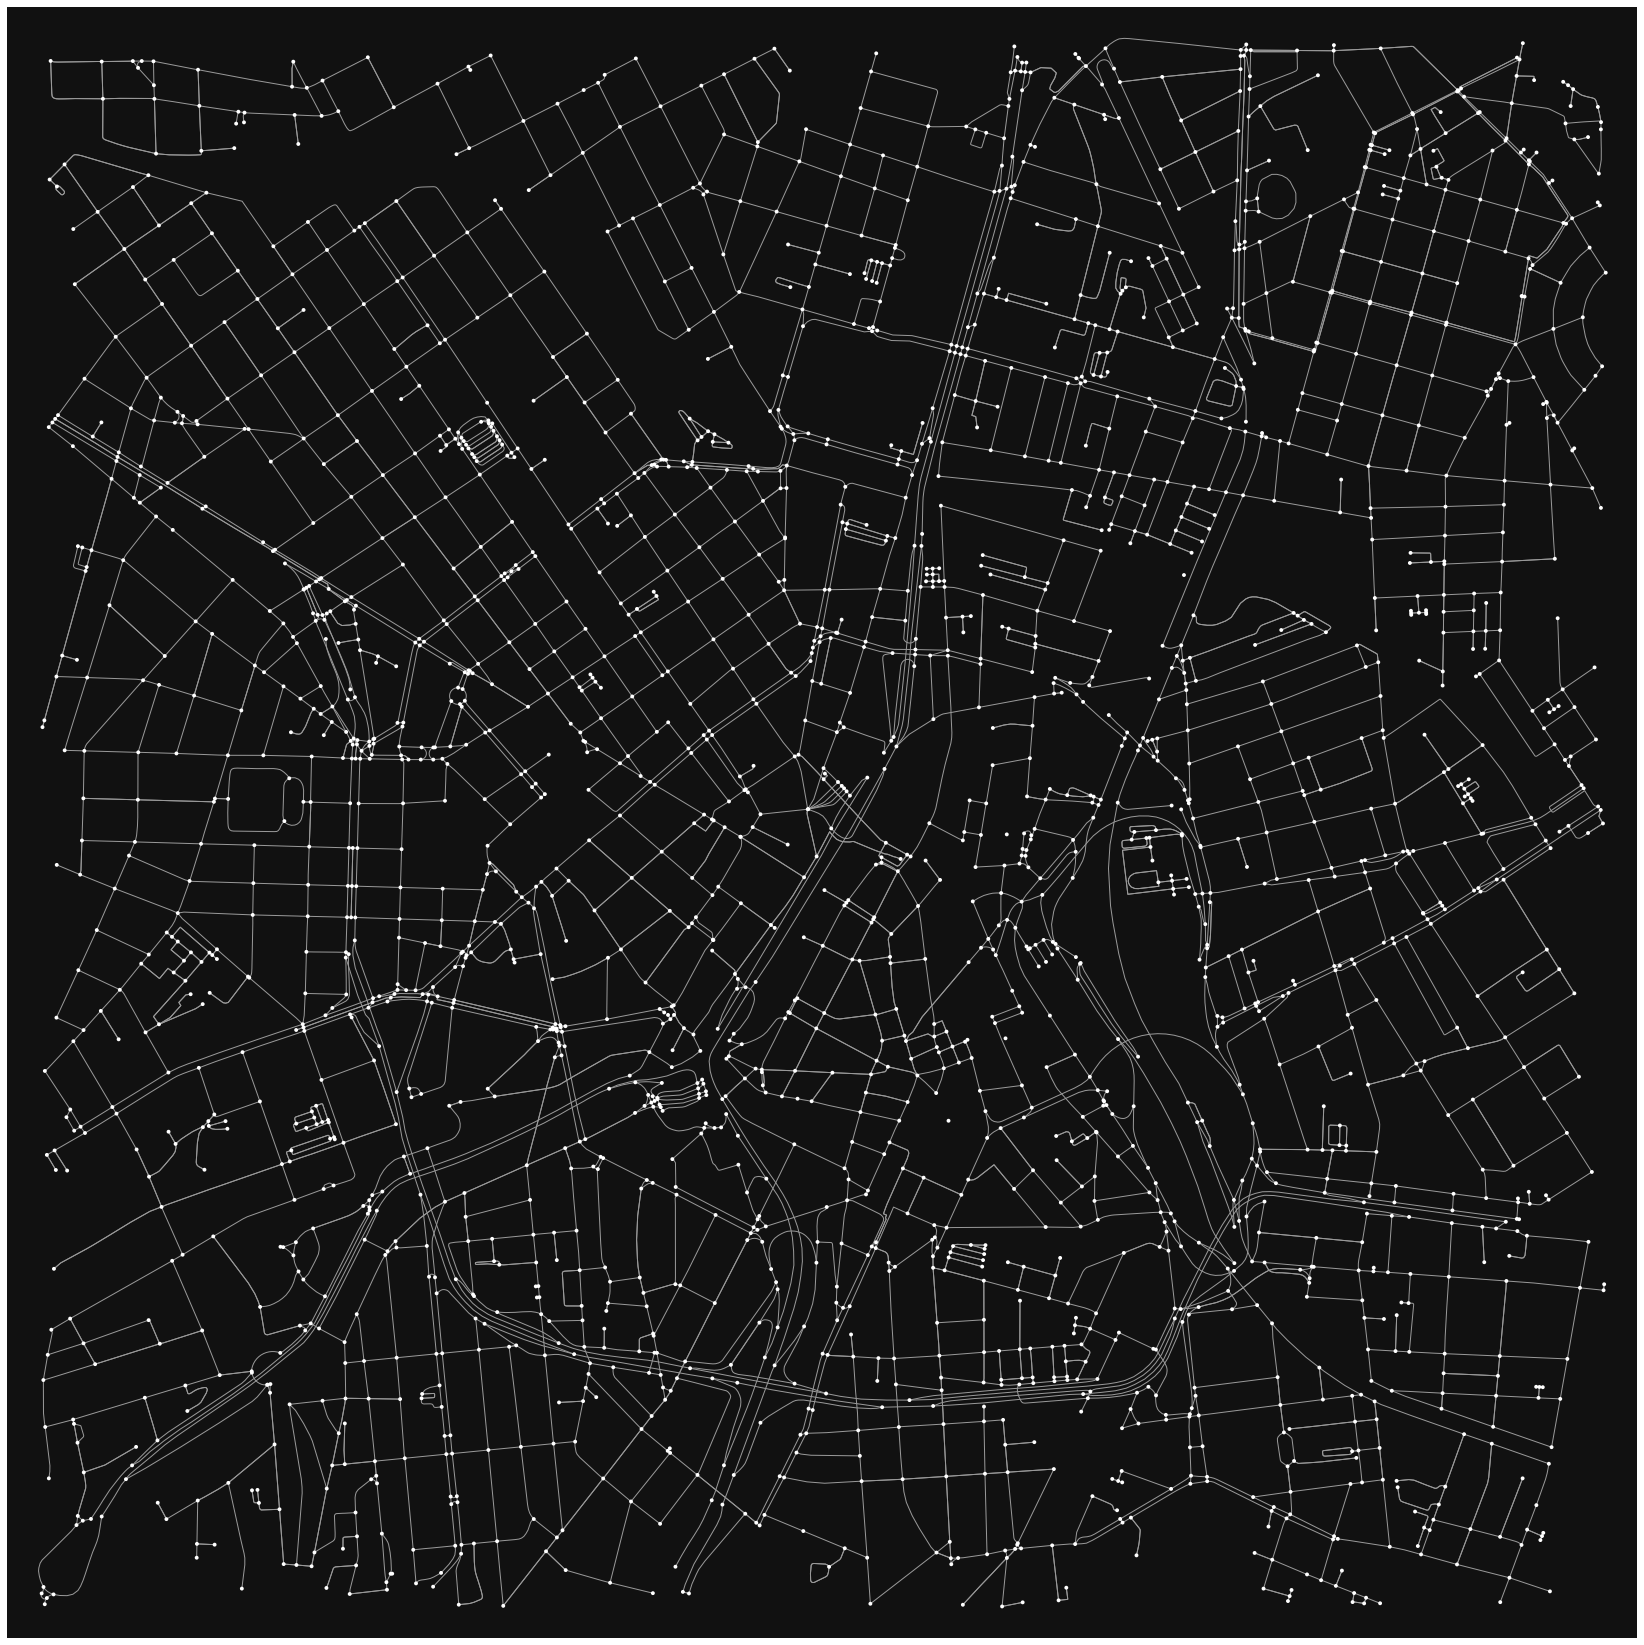

(<Figure size 2880x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87d111b390>)

In [21]:
#Plotando 2 mapas. 1 com as rotas sem alagamentos. 2 Com as ruas alagadas removidas.
fig,ax= ox.plot_graph_routes(graph, routes = [route,rota_sem_alagamento], route_colors=['Red','Orange'],figsize=(40,30),node_color='gray', node_size= 45, bgcolor = 'ivory')
ox.plot_graph(G2,figsize=(40, 30))

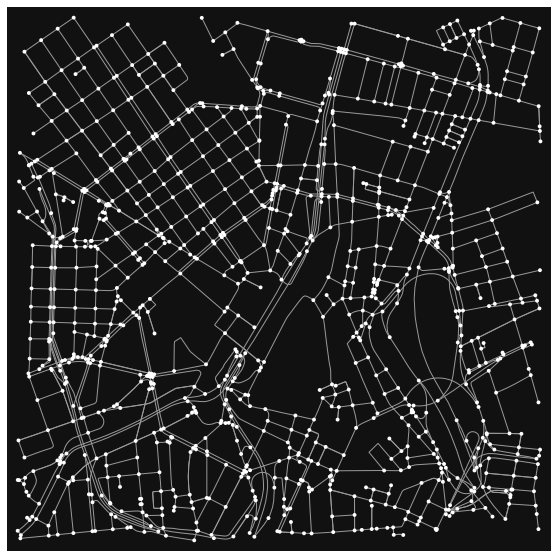

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87d0dd39d0>)

In [22]:
####### PARTE 2 Analises ######
###############################

grafo_analises = ox.graph_from_point(coords,dist=1400, network_type='drive') #rodamos com 1400 demorou 1h metade da memória
ox.plot_graph(grafo_analises,figsize=(20, 10))

In [23]:
#quantidade de nós e arestas
no,ed = ox.graph_to_gdfs(grafo_analises)
print(len(no),len(ed))

1059 1838


In [24]:
#encontrando os indices / nós
origens = []

for i in (no.iterrows()):

   origens.append(i[0])

n = len(origens)

print(n,'\n',origens) 


1059 
 [597282, 597283, 25871670, 25871831, 25871833, 25872025, 25872075, 25872212, 25872232, 25872236, 25872254, 25872264, 25872274, 25872723, 25872726, 25872749, 25872763, 25872766, 25928388, 25928438, 25928439, 25928614, 25928755, 25928842, 25928939, 25928961, 25928964, 25929039, 60624525, 60641012, 60641027, 60641028, 60641030, 60641031, 60641034, 60641038, 60641043, 60641048, 60641052, 60641085, 60641086, 60641088, 60641089, 60641100, 60641101, 60641102, 60641117, 60641149, 60641181, 60641211, 60641252, 60641257, 60641282, 60641305, 60641326, 60641359, 60641364, 60641382, 60641387, 60641411, 60641414, 60641488, 60641511, 60641571, 60641664, 60641667, 60685349, 60685350, 60685352, 60685357, 60685358, 60685360, 60685363, 60685365, 60685366, 60685374, 60685376, 60685377, 60685384, 60685387, 60685391, 60685397, 60685402, 60685404, 60685409, 60685428, 60685429, 60685431, 60685446, 60685465, 60685472, 60685476, 60685613, 60685619, 60685620, 60685622, 60685624, 60685633, 60685635, 606856

In [25]:
#calculando menores caminhos e seus comprimentos de um ponto todos os ponto até todos os outros
cp = []
rt = []

comprimento_all = [[]]*n
rotas_all = [[]]*n

for i in (origens):
   cp.append(nx.single_source_dijkstra_path_length(grafo_analises,source = i, weight ='length')) #comprimento
   rt.append(nx.single_source_dijkstra_path(grafo_analises, source=i, weight = 'length'))      #rotas

for i in range(n): #arranjando em listas as rotas 
   aux1 = []
   for j in rt[i].values():
         aux1.append(j)
        
   rotas_all[i] = aux1

for i in range(n): #arranjando em listas os comprimentos
   aux2 = []
   for j in cp[i].values():
         aux2.append(j)

   comprimento_all[i] = aux2


In [26]:
#data frame menor caminho
menor_caminho = gpd.GeoDataFrame(data = cp,index = origens,columns= origens)


In [27]:
menor_caminho

597282      597283      ...  9169859813  9216158300
597282           0.000         NaN  ...    2748.115    2638.126
597283         263.318         0.0  ...    3011.433    2901.444
25871670       167.970         NaN  ...    2911.002    2801.013
25871831        98.752         NaN  ...    2846.867    2736.878
25871833       153.904         NaN  ...    2902.019    2792.030
...                ...         ...  ...         ...         ...
9169818555         NaN         NaN  ...     806.164    2060.659
9169818556         NaN         NaN  ...     792.273    2046.768
9169859811         NaN         NaN  ...    1565.771    1342.156
9169859813         NaN         NaN  ...       0.000    1254.495
9216158300         NaN         NaN  ...    2117.344       0.000

[1059 rows x 1059 columns]

In [28]:
### Matriz de Eficiência original 
eficiencia = menor_caminho.copy()
eficiencia = eficiencia.mask(eficiencia > 0,1/eficiencia) 
  
eficiencia

597282      597283      ...  9169859813  9216158300
597282        0.000000         NaN  ...    0.000364    0.000379
597283        0.003798         0.0  ...    0.000332    0.000345
25871670      0.005953         NaN  ...    0.000344    0.000357
25871831      0.010126         NaN  ...    0.000351    0.000365
25871833      0.006498         NaN  ...    0.000345    0.000358
...                ...         ...  ...         ...         ...
9169818555         NaN         NaN  ...    0.001240    0.000485
9169818556         NaN         NaN  ...    0.001262    0.000489
9169859811         NaN         NaN  ...    0.000639    0.000745
9169859813         NaN         NaN  ...    0.000000    0.000797
9216158300         NaN         NaN  ...    0.000472    0.000000

[1059 rows x 1059 columns]

In [29]:
#Eficiência Global matriz menor_caminho
soma_ef = eficiencia.sum(axis = 1).sum()
print("Soma da eficiência:",soma_ef)

ef_global = soma_ef*(1/(n*(n-1))) 

print("Eficiência Global:",ef_global)

Soma da eficiência: 626.0941433122443
Eficiência Global: 0.0005588020793167613


In [30]:
#SPAWN --- Shortest_Paths_without_node
from functools import partial
def SPAWN(No,Grafo,origens_sem_no): 
    grafo_sem_no = Grafo.copy()                            #gerando grafo copia para manipulação
    
    print("\nNó selecionado:",No,'\n')
    grafo_sem_no.remove_node(No)                         #removendo nó selecionado

    #calculando menores caminhos e seus comprimentos de um ponto todos os ponto até todos os outros com pontos removidos
    mapfunc = partial(nx.single_source_dijkstra_path_length,grafo_sem_no,weight ='length')
    cp_sem_no = list(map(mapfunc,origens_sem_no))

    menor_caminho_spawn = gpd.GeoDataFrame(data = cp_sem_no,index = origens_sem_no,columns= origens_sem_no)
    
    return menor_caminho_spawn
    

In [31]:
#Vulnerabilidade 

def vulnerabilidade(No,numero_vertice, ef_V):

   ef_V = ef_V*(1/(numero_vertice*(numero_vertice-1)))                  
   print(f'A eficiencia (G,{No}) é ---> {ef_V}')

   Vulne =  (ef_global - ef_V)/ef_global
   Vulne = Vulne * 100
   
   print(f'A vulnerabilidade do nó {No} é ---> {Vulne}')       
   print('')
   
   return Vulne

In [32]:
#Mostrando as eficiências de cada nó removidos e vulnerabilidade
vulnerability = []
spawn_s = []
for nod, j in  zip(origens,range(len(origens))):
  print("Numero:",j)
  ef = 0
  
  eficiencia_sem_no=0

  origem_vulnerabilidade = origens.copy() 
  origem_vulnerabilidade.remove(nod) 
  
  aux3 = SPAWN(nod,grafo_analises,origem_vulnerabilidade)
  
  spawn_s.append(aux3)
  eficiencia_sem_no  = aux3.mask(aux3 > 0,1/aux3) 

  ef = np.ma.masked_invalid(eficiencia_sem_no).sum()

  print(f'Soma Total das eficiencias:',ef)
  
  vulnerability.append(vulnerabilidade(nod,len(origens),ef))
  print("####################################################################\n")
aux5 = ["%.6f" % member for member in vulnerability]
vulnerability = [float(vulnerability) for vulnerability in aux5]




A saída de streaming foi truncada nas últimas 5000 linhas.
Numero: 559

Nó selecionado: 461879227 

Soma Total das eficiencias: 621.1313080092029
A eficiencia (G,461879227) é ---> 0.0005543726453150715
A vulnerabilidade do nó 461879227 é ---> 0.792665984189905

####################################################################

Numero: 560

Nó selecionado: 461879234 

Soma Total das eficiencias: 624.8274986910657
A eficiencia (G,461879234) é ---> 0.0005576715725780694
A vulnerabilidade do nó 461879234 é ---> 0.20230897137572917

####################################################################

Numero: 561

Nó selecionado: 461879236 

Soma Total das eficiencias: 624.4788904386564
A eficiencia (G,461879236) é ---> 0.0005573604324430049
A vulnerabilidade do nó 461879236 é ---> 0.257988816992072

####################################################################

Numero: 562

Nó selecionado: 461879259 

Soma Total das eficiencias: 620.276464258463
A eficiencia (G,461879259) é ---> 

In [33]:
#Inserindo a coluna de vulnerabilidade
no.insert(loc = 3, column= 'Vulnerabilidade', value = vulnerability)

In [34]:
#gerando um grafo com as alterações no geodataframe dos nós
grafo_analises = ox.graph_from_gdfs(no,ed)

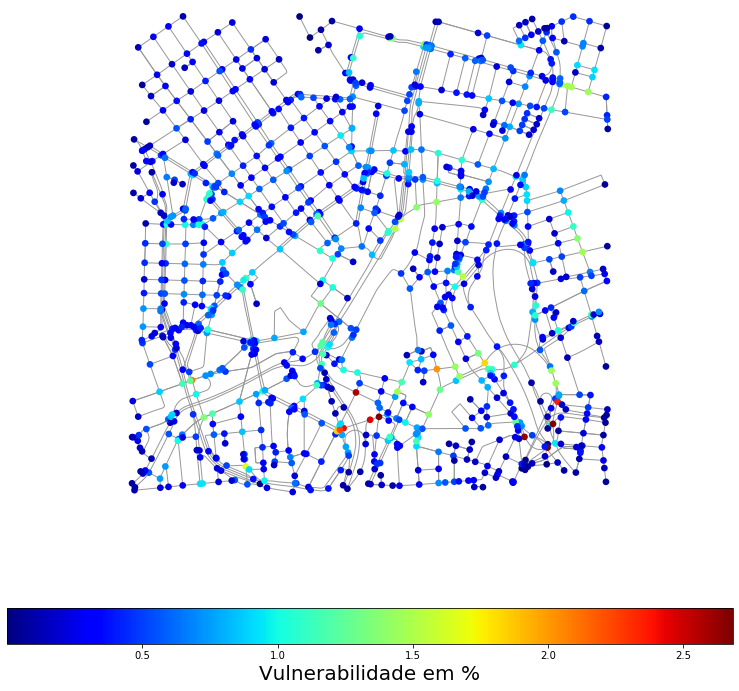

In [35]:
import matplotlib as mpl

G = ox.project_graph(grafo_analises)
cmap = plt.cm.get_cmap('jet')
norm = plt.Normalize(vmin=min(vulnerability), vmax=max(vulnerability))
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

nc = ox.plot.get_node_colors_by_attr(grafo_analises, cmap='jet',attr='Vulnerabilidade')

fig, ax = ox.plot_graph(grafo_analises, node_color=nc, node_size= 45, figsize=(13,13), bgcolor = 'white',show=False)

plt.colorbar(sm,orientation='horizontal').set_label('Vulnerabilidade em %',fontsize =20)


In [36]:
#### Matriz SPAWN

Spawn = [] 

for i , j in zip(origens,range(len(origens))):
  #gerando matriz N-1 comparativa
  print('Número:',j)

  matriz_N_1 = 0
  matriz_spawn = 0
  matriz_N_1 = menor_caminho.copy() # Matriz cópia n-1 

  matriz_N_1 = matriz_N_1.drop([i],axis = 0) #removendo a coluna do nó escolhido
  matriz_N_1= matriz_N_1.drop([i],axis = 1)  #removendo a linha do nó escolhido



  matriz_N_1 = matriz_N_1.replace(np.nan, -1 )  #removendo todos os nan, necessário para cálcular spawn
 
#=============================================================================== 

 #Gerando matriz spawn
  origem_spawn = origens.copy()  # gerando lista nova
  origem_spawn.remove(i)   #Removendo nó da lista 

  
  matriz_spawn = spawn_s[j]
  
  matriz_spawn = matriz_spawn.mask(matriz_N_1 < 0,1) 

  matriz_spawn = matriz_spawn.replace(np.nan, -1) 
  
  matriz_spawn = matriz_spawn.mask(matriz_spawn  < 0, matriz_N_1) 

#===============================================================================
#Somando tudo

  soma_spawn_N_1 = matriz_N_1.where(matriz_N_1 != -1).sum(axis=1).sum()

  soma_spawn_MTX = matriz_spawn.where(matriz_spawn != 1).sum(axis=1).sum()

  diferenca = soma_spawn_MTX - soma_spawn_N_1

  Spawn.append(100*(diferenca/soma_spawn_N_1))

  print(f'Resultado Matriz Spawn: {soma_spawn_MTX/1000:.9} Kilometros')
  print(f'Resultado Matriz N - 1: {soma_spawn_N_1/1000:.9} Kilometros\n')
  print(f'\nImpacto em metros da remoção do nó({i}): {100*(diferenca/soma_spawn_N_1)} em %\n')

aux6 = ["%.3f" % member for member in Spawn]
Spawn = [float(Spawn) for Spawn in aux6]

A saída de streaming foi truncada nas últimas 5000 linhas.
Impacto em metros da remoção do nó(395763907): 0.0 em %

Número: 345
Resultado Matriz Spawn: 2242913.69 Kilometros
Resultado Matriz N - 1: 2241130.26 Kilometros


Impacto em metros da remoção do nó(395763917): 0.07957722237477594 em %

Número: 346
Resultado Matriz Spawn: 2244395.92 Kilometros
Resultado Matriz N - 1: 2242765.86 Kilometros


Impacto em metros da remoção do nó(395763930): 0.0726806618310999 em %

Número: 347
Resultado Matriz Spawn: 2245524.51 Kilometros
Resultado Matriz N - 1: 2245301.83 Kilometros


Impacto em metros da remoção do nó(395763938): 0.009917537370008134 em %

Número: 348
Resultado Matriz Spawn: 2246377.91 Kilometros
Resultado Matriz N - 1: 2242937.66 Kilometros


Impacto em metros da remoção do nó(395763941): 0.15338105353574785 em %

Número: 349
Resultado Matriz Spawn: 2243583.37 Kilometros
Resultado Matriz N - 1: 2242277.51 Kilometros


Impacto em metros da remoção do nó(395763951): 0.0582378693697

In [37]:
#Inserindo a coluna de SPAWN
no.insert(loc = 4, column= 'SPAWN (Km)', value = Spawn)

In [38]:
#gerando um grafo com as alterações no geodataframe dos nós
grafo_analises = ox.graph_from_gdfs(no,ed)

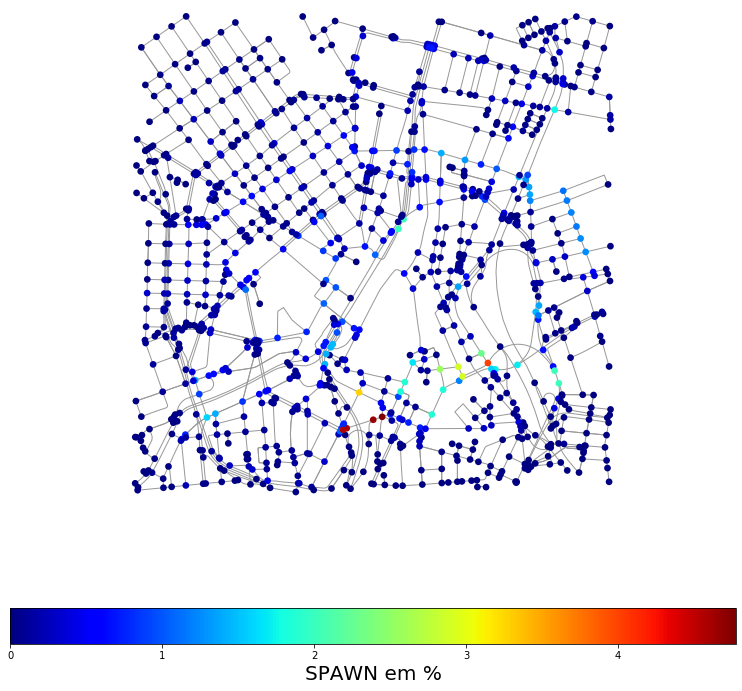

In [39]:
#plotando spawn
G = ox.project_graph(grafo_analises)
cmap = plt.cm.get_cmap('jet')
norm = plt.Normalize(vmin=min(Spawn), vmax=max(Spawn))
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

nc = ox.plot.get_node_colors_by_attr(grafo_analises, cmap='jet',attr='SPAWN (Km)')

fig, ax = ox.plot_graph(grafo_analises, node_color=nc, node_size= 45, figsize=(13,13), bgcolor = 'white',show=False)

plt.colorbar(sm,orientation='horizontal').set_label('SPAWN em %',fontsize =20)

In [40]:
#Organizando os pontos de alagamentos
alag = []

for i in origens:
   if i in all_nodes:
     alag.append(1)
   
   else:
     alag.append(0)

In [41]:
#Inserindo a coluna de SAlag
no.insert(loc = 5, column= 'Alag (0/1)', value = alag)

In [42]:
#gerando um grafo com as alterações no geodataframe dos nós
grafo_analises = ox.graph_from_gdfs(no,ed)

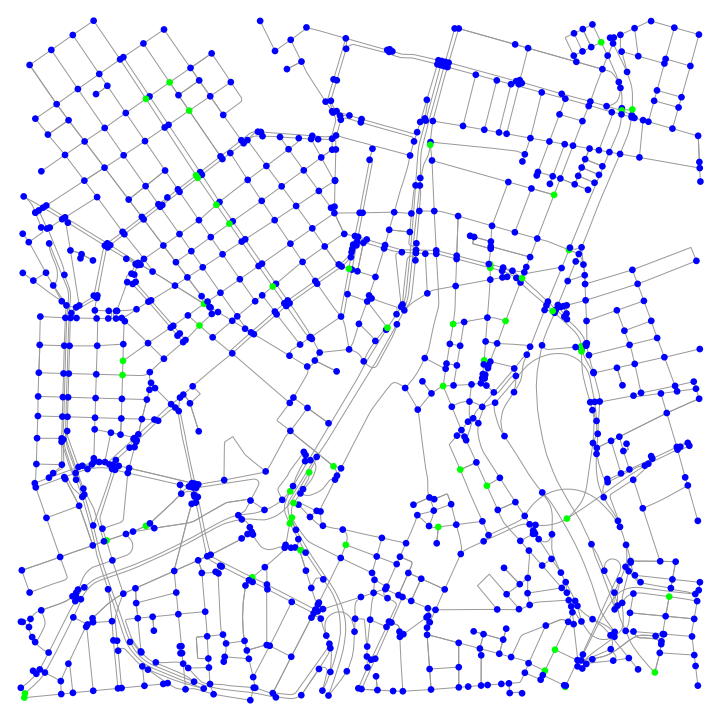

In [43]:
#plotando Alagamentos
G = ox.project_graph(grafo_analises)

nc = ox.plot.get_node_colors_by_attr(grafo_analises, cmap='brg',attr='Alag (0/1)')

fig, ax = ox.plot_graph(grafo_analises, node_color=nc, node_size= 45, figsize=(13,13), bgcolor = 'white',show=False)

In [ ]:
no.rename(columns={'y':'LAT','x':'LONG'})

In [45]:
#criando CSV com dados
no = no.rename_axis('Nós')
no = no.rename(columns={'y':'LAT','x':'LONG'})
no.to_csv(r'/content/drive/MyDrive/IC_Arthur_UNIFESP/Dados/Dados_Vulne_SPAWN_Alag_1.4km.csv',encoding='utf-8',index = True,columns=['LAT','LONG','Vulnerabilidade','SPAWN (Km)','Alag (0/1)'])